In [2]:
import numpy as np
from random import randint
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = load_digits()
images = dataset.images
X = dataset.data
y = dataset.target

print(images.shape)
print(X.shape)
print(y.shape)

(1797, 8, 8)
(1797, 64)
(1797,)


549 5


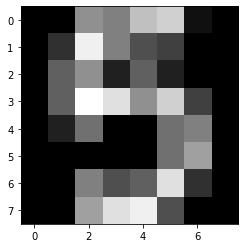

In [4]:
idx = randint(0, images.shape[0])
print(idx, y[idx])
plt.imshow(images[idx], cmap='gray')
plt.show()

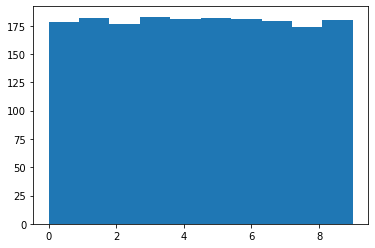

In [5]:
plt.hist(y)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [7]:
print(X_train.shape)
print(X_test.shape)

(1437, 64)
(360, 64)


In [8]:
y_train[:10]

array([6, 0, 0, 3, 0, 5, 0, 0, 4, 1])

In [9]:
X_train[0,:]

array([ 0.,  0.,  3., 14.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,
        0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  5.,
       16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  5.,  2.,  0.,
        0.,  0.,  4., 16.,  2., 12., 15.,  2.,  0.,  0.,  1., 14., 13.,
        2., 13., 11.,  0.,  0.,  0.,  3., 11., 16., 13.,  4.,  0.])

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_t = sc.transform(X_train)
X_test_t = sc.transform(X_test)
X_train_t[0,:]

array([ 0.        , -0.34169755, -0.46336049,  0.50836462, -2.54590607,
       -1.03722581, -0.40623424, -0.13101874, -0.06103492, -0.61725402,
        0.30881425,  0.00348328, -2.18152552, -1.35608548, -0.52465505,
       -0.13336005, -0.04991522,  0.12851911,  1.08857992, -0.19343737,
       -1.16010978, -1.27307852, -0.552537  , -0.11409248, -0.03733267,
        0.86365151,  1.13744682, -1.16195968, -1.60835913, -1.28296188,
       -0.62554872, -0.04573894,  0.        ,  1.09151514,  1.34318585,
       -1.12678131, -0.90106555, -1.13185292, -0.81347241,  0.        ,
       -0.06519029,  0.82828946,  1.39981472, -0.82540858,  0.69177178,
        1.17865528, -0.33784246, -0.09403434, -0.03963009,  0.15955797,
        1.14244768,  0.64507954, -1.42282149,  0.68917912,  1.47990131,
       -0.21608405, -0.02638899, -0.30677646, -0.49962244, -0.246272  ,
        0.84804385,  1.05270303,  0.45952251, -0.19710003])

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(hidden_layer_sizes=(100, 10), alpha=1e-4, activation='logistic', shuffle=True, max_iter=10000)

In [16]:
clf.fit(X_train_t, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [17]:
y_pred_test = clf.predict(X_test_t)
y_pred_train = clf.predict(X_train_t)

In [18]:
exactitude_test = accuracy_score(y_pred_test, y_test)
exactitude_train = accuracy_score(y_pred_train, y_train)
print("Justesse", exactitude_train, exactitude_test)

Justesse 0.9993041057759221 0.9638888888888889


idx 324 label 7


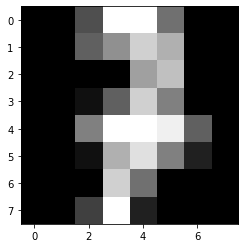

Prédiction [7]


In [21]:
idx = randint(0, X_test.shape[0])
print("idx", idx, "label", y_test[idx])
x_test = X_test[idx]
image = x_test.reshape(8,8)
plt.imshow(image, cmap='gray') 
plt.show()

x_test_sdt = sc.transform([x_test])
label = clf.predict(x_test_sdt)
print("Prédiction", label)